In [1]:
from init import *
from utils import (
    device,
    summary,
    train_transforms,test_transforms,
    train,test,
    train_losses,test_losses,train_acc,test_acc
    )
from model import Net

c:\Users\muthu\miniconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = toml.load('config.toml')

In [3]:
# Dataset
train_data = datasets.MNIST('../../data', train=True, download=False, transform=train_transforms)
test_data = datasets.MNIST('../../data', train=False, download=False, transform=test_transforms)

In [4]:
kwargs = {
    'batch_size': config['batch_size'],
    'shuffle'   : config['shuffle'],
    'num_workers':config['num_workers'],
    'pin_memory': config['pin_memory']
}

test_loader = torch.utils.data.DataLoader(test_data,**kwargs)
train_loader = torch.utils.data.DataLoader(train_data,**kwargs)

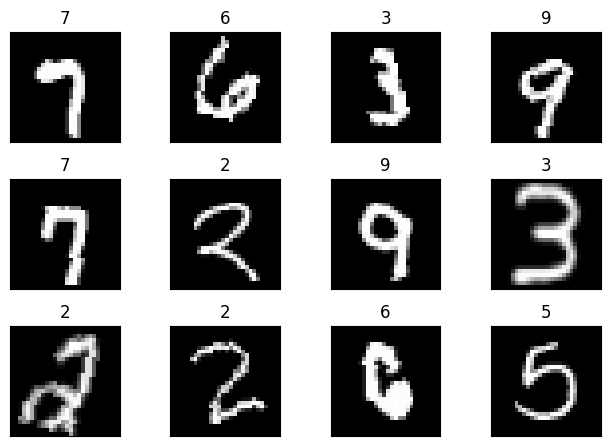

In [5]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 
fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])
plt.show()

In [6]:
model = Net().to(device)

In [7]:
optimizer = optim.SGD(
    model.parameters(), 
    lr=config['optimizer'].get('lr'), 
    momentum=config['optimizer'].get('momentum'),
)

scheduler = optim.lr_scheduler.StepLR(
    optimizer, 
    step_size=config['scheduler'].get('step_size') , 
    gamma=config['scheduler'].get('gamma'), 
    verbose=True
)

criterion = F.nll_loss

Adjusting learning rate of group 0 to 1.0000e-02.


In [8]:
num_epochs = config['training'].get('num_epochs')

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=0.0534 Batch_id=468 Accuracy=83.12: 100%|██████████| 469/469 [00:10<00:00, 46.00it/s]


Test set: Average loss: 0.0828, Accuracy: 9738/10000 (97.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0991 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:10<00:00, 46.39it/s]


Test set: Average loss: 0.0355, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1614 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:10<00:00, 46.63it/s]


Test set: Average loss: 0.0365, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0685 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:09<00:00, 47.69it/s]


Test set: Average loss: 0.0272, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0058 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:09<00:00, 47.66it/s]


Test set: Average loss: 0.0233, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0977 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:10<00:00, 46.75it/s]


Test set: Average loss: 0.0233, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0735 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:09<00:00, 47.07it/s]


Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0108 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:09<00:00, 47.23it/s]


Test set: Average loss: 0.0250, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0346 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:10<00:00, 46.80it/s]


Test set: Average loss: 0.0224, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0032 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:09<00:00, 47.22it/s]


Test set: Average loss: 0.0243, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0364 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:09<00:00, 47.28it/s]


Test set: Average loss: 0.0220, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0189 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:09<00:00, 47.28it/s]


Test set: Average loss: 0.0219, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1996 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:09<00:00, 47.99it/s]


Test set: Average loss: 0.0255, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0336 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:09<00:00, 47.29it/s]


Test set: Average loss: 0.0218, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0060 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:09<00:00, 47.27it/s]


Test set: Average loss: 0.0218, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0012 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:09<00:00, 47.09it/s]


Test set: Average loss: 0.0164, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0005 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:09<00:00, 47.64it/s]


Test set: Average loss: 0.0163, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0067 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:10<00:00, 45.96it/s]


Test set: Average loss: 0.0161, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0086 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:09<00:00, 47.11it/s]


Test set: Average loss: 0.0162, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0119 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:09<00:00, 47.20it/s]


Test set: Average loss: 0.0168, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

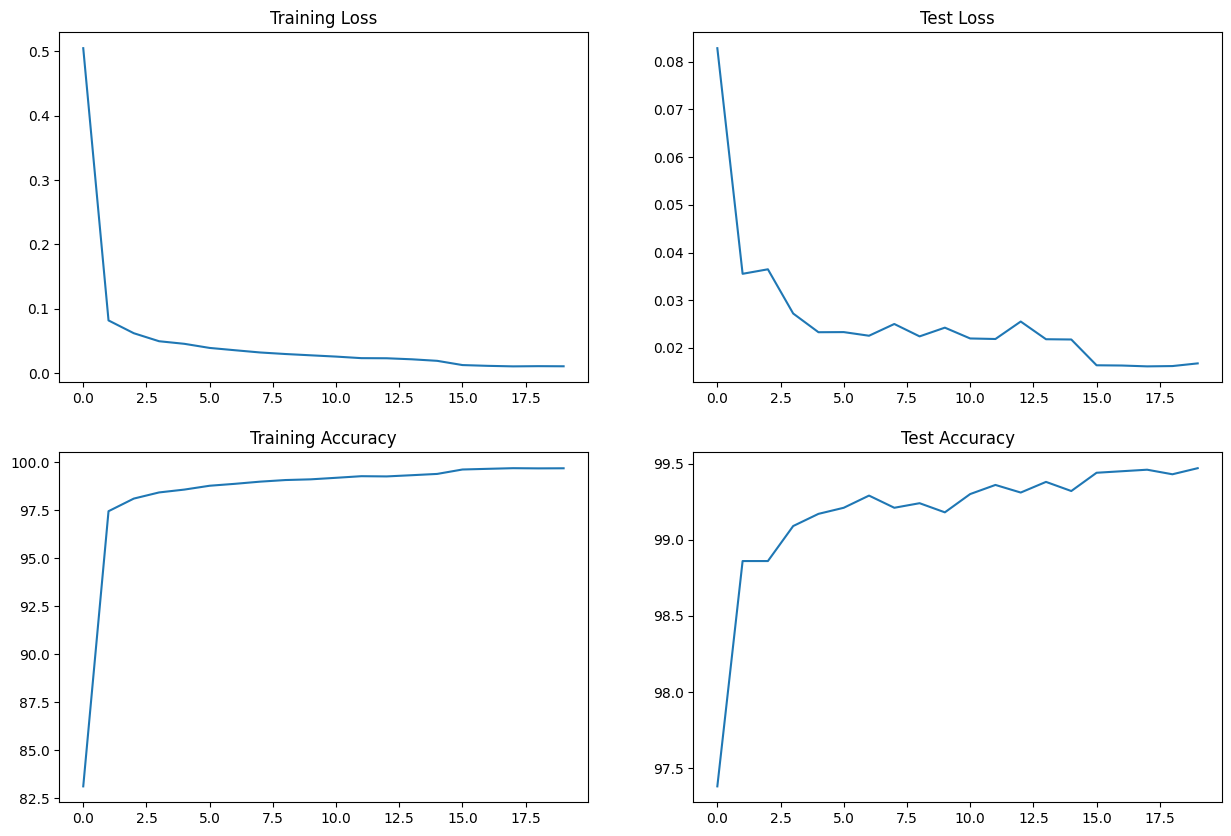

In [9]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [10]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
